# Retail Data Wrangling and Analytics

In [30]:
# Import modules 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [31]:
from sqlalchemy import create_engine

user = 'postgres'
password = 'rocky1234'
host = 'jrvs-psql'
port = '5432'
database = 'postgres'

engine_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(engine_string)


In [32]:
import pandas as pd

retail_df = pd.read_sql_table('retail', con=engine)
retail_df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [33]:
retail_df = pd.read_sql_query('SELECT * FROM retail;', con=engine)
retail_df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
retail_df.info()      # Overview of columns, data types, and null counts
retail_df.head(10)    # First 10 rows for a quick peek
retail_df.describe()  # Statistical summary of numeric columns
retail_df.sample(10)  # Random 10 rows to check variety


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   invoice_no    1067371 non-null  object        
 1   stock_code    1067371 non-null  object        
 2   description   1062989 non-null  object        
 3   quantity      1067371 non-null  int64         
 4   invoice_date  1067371 non-null  datetime64[ns]
 5   unit_price    1067371 non-null  float64       
 6   customer_id   824364 non-null   float64       
 7   country       1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
444328,531756,21679,SKULLS STICKERS,6,2010-11-09 13:24:00,0.85,17983.0,United Kingdom
737484,555406,48138,DOORMAT UNION FLAG,2,2011-06-02 19:50:00,7.95,17231.0,United Kingdom
85396,497353,22148,EASTER CRAFT 4 CHICKS,1,2010-02-08 16:48:00,4.21,NaN,United Kingdom
144907,503181,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,2,2010-03-30 14:23:00,8.50,14492.0,United Kingdom
430456,530510,20871,OPULENT VELVET SET/3 CANDLES,6,2010-11-03 12:11:00,2.10,15281.0,United Kingdom
827043,563348,22726,ALARM CLOCK BAKELIKE GREEN,8,2011-08-15 13:48:00,3.75,13078.0,United Kingdom
597468,542225,85096,label mix up,-59,2011-01-26 13:10:00,0.00,NaN,United Kingdom
170225,505523,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,8,2010-04-22 16:12:00,9.95,15093.0,United Kingdom
913286,570388,23408,PHOTO FRAME LINEN AND LACE SMALL,6,2011-10-10 12:37:00,2.08,14911.0,EIRE
326328,521202,21035,SET/2 RED SPOTTY TEA TOWELS,1,2010-09-02 17:52:00,5.91,NaN,United Kingdom


In [3]:
#install psql "driver"
!pip3 install psycopg2-binary

     |████████████████████████████████| 3.0 MB 6.0 MB/s eta 0:00:01:01


In [35]:
# Example of renaming columns to snake_case
retail_df.columns = [col.lower().replace(' ', '_') for col in retail_df.columns]

# Convert invoice date to datetime
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'])

# Check for nulls
print(retail_df.isnull().sum())


invoice_no           0
stock_code           0
description       4382
quantity             0
invoice_date         0
unit_price           0
customer_id     243007
country              0
dtype: int64


# Total Invoice Amount Distribution

In [38]:
print(retail_df.columns.tolist())


['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country', 'item_total']


In [39]:
retail_df['item_total'] = retail_df['quantity'] * retail_df['unit_price']
invoice_amount_df = retail_df.groupby('invoice_no')['item_total'].sum().reset_index()
invoice_amount_df.rename(columns={'item_total': 'invoice_amount'}, inplace=True)
invoice_amount_df.head()


,invoice_no,invoice_amount
0,489434,505.30
1,489435,145.80
2,489436,630.33
3,489437,310.75
4,489438,2286.24


# Monthly Placed and Canceled Orders

In [40]:
retail_df['year_month'] = retail_df['invoice_date'].dt.strftime('%Y%m').astype(int)


In [41]:
# Filter canceled orders (negative quantity)
canceled_orders = retail_df[retail_df['quantity'] < 0]


In [42]:
total_orders_per_month = retail_df.groupby('year_month')['invoice_no'].nunique()
canceled_orders_per_month = canceled_orders.groupby('year_month')['invoice_no'].nunique()


In [43]:
placed_orders = total_orders_per_month - 2 * canceled_orders_per_month
placed_orders = placed_orders.fillna(total_orders_per_month)  # Handle months with zero canceled orders


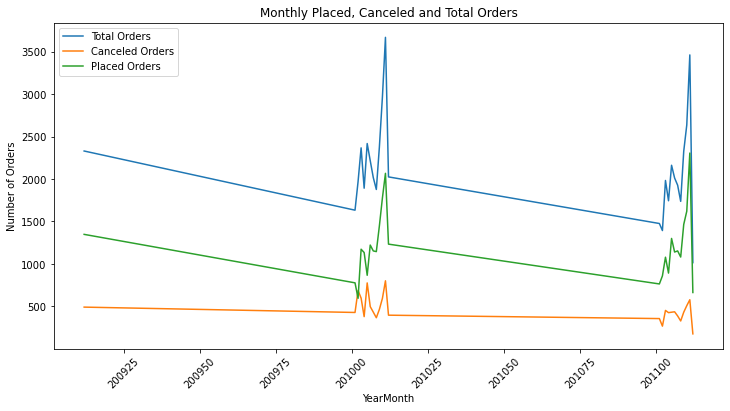

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(total_orders_per_month.index, total_orders_per_month, label='Total Orders')
plt.plot(canceled_orders_per_month.index, canceled_orders_per_month, label='Canceled Orders')
plt.plot(placed_orders.index, placed_orders, label='Placed Orders')

plt.xlabel('YearMonth')
plt.ylabel('Number of Orders')
plt.title('Monthly Placed, Canceled and Total Orders')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Monthly Sales

In [45]:
retail_df['year_month'] = retail_df['invoice_date'].dt.strftime('%Y%m').astype(int)


In [46]:
retail_df['item_total'] = retail_df['quantity'] * retail_df['unit_price']


In [47]:
monthly_sales = retail_df.groupby('year_month')['item_total'].sum().reset_index()


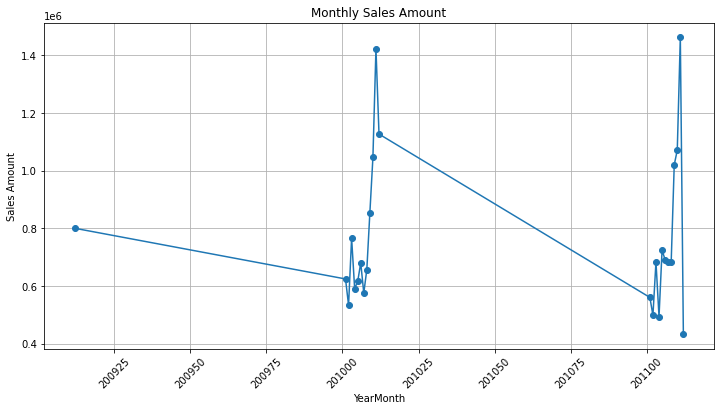

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['year_month'], monthly_sales['item_total'], marker='o')
plt.title('Monthly Sales Amount')
plt.xlabel('YearMonth')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Sales Growth


In [49]:
monthly_sales['pct_growth'] = monthly_sales['item_total'].pct_change() * 100


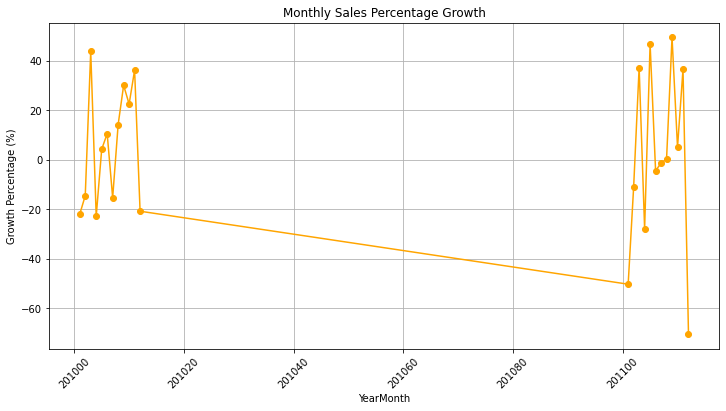

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['year_month'], monthly_sales['pct_growth'], marker='o', color='orange')
plt.title('Monthly Sales Percentage Growth')
plt.xlabel('YearMonth')
plt.ylabel('Growth Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Monthly Active Users

In [51]:
retail_df['year_month'] = retail_df['invoice_date'].dt.strftime('%Y%m').astype(int)
monthly_active_users = retail_df.groupby('year_month')['customer_id'].nunique().reset_index()
monthly_active_users.rename(columns={'customer_id': 'active_users'}, inplace=True)



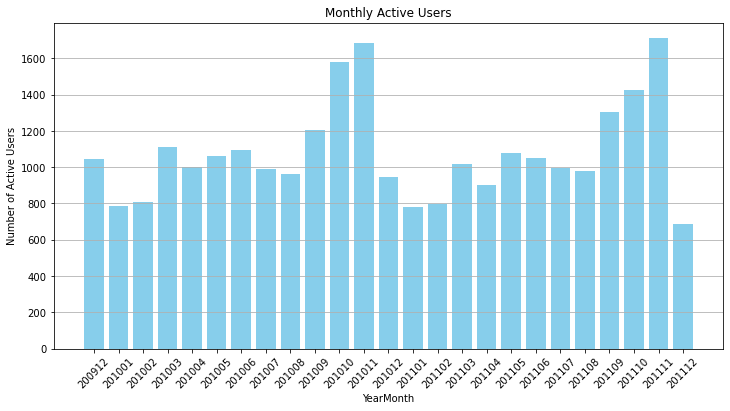

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(monthly_active_users['year_month'].astype(str), monthly_active_users['active_users'], color='skyblue')
plt.title('Monthly Active Users')
plt.xlabel('YearMonth')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# New and Existing Users



In [53]:
first_purchase = retail_df.groupby('customer_id')['year_month'].min().reset_index()
first_purchase.rename(columns={'year_month': 'first_purchase_month'}, inplace=True)
retail_with_first = retail_df.merge(first_purchase, on='customer_id', how='left')
retail_with_first['user_type'] = retail_with_first.apply(
    lambda row: 'New' if row['year_month'] == row['first_purchase_month'] else 'Existing',
    axis=1
)
monthly_users = retail_with_first.groupby(['year_month', 'user_type'])['customer_id'].nunique().reset_index()
monthly_users_pivot = monthly_users.pivot(index='year_month', columns='user_type', values='customer_id').fillna(0)





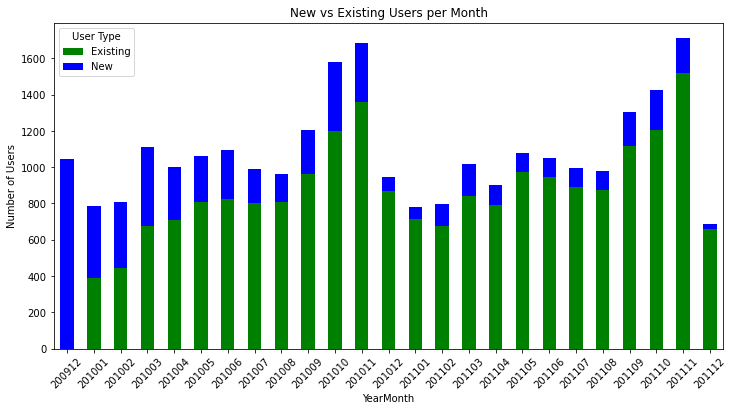

In [54]:
monthly_users_pivot.plot(kind='bar', stacked=True, figsize=(12,6), color=['green', 'blue'])
plt.title('New vs Existing Users per Month')
plt.xlabel('YearMonth')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


## Finding RFM

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in the retail and professional services industries. ([wikipedia](https://en.wikipedia.org/wiki/RFM_(market_research)))

Optional Reading: [Making Your Database Pay Off Using Recency Frequency and Monetary Analysis](http://www.dbmarketing.com/2010/03/making-your-database-pay-off-using-recency-frequency-and-monetary-analysis/)


RFM stands for three dimensions:

- Recency – How recently did the customer purchase?

- Frequency – How often do they purchase?

- Monetary Value – How much do they spend?

Note: To simplify the problem, let's keep all placed and canceled orders.


**Sample RFM table**

![](https://i.imgur.com/sXFIg6u.jpg)

In [55]:
import pandas as pd

# Assuming invoice_date is datetime type, if not convert it first:
retail_df['invoice_date'] = pd.to_datetime(retail_df['invoice_date'])

# Define a reference date for recency (can be max invoice date + 1 day or today's date)
reference_date = retail_df['invoice_date'].max() + pd.Timedelta(days=1)


In [56]:
# Aggregate per customer
rfm_df = retail_df.groupby('customer_id').agg({
    'invoice_date': lambda x: (reference_date - x.max()).days,  # Recency: days since last purchase
    'invoice_no': 'nunique',                                   # Frequency: number of unique invoices
    'item_total': 'sum'                                        # Monetary: total spent
}).reset_index()

rfm_df.rename(columns={
    'invoice_date': 'Recency',
    'invoice_no': 'Frequency',
    'item_total': 'Monetary'
}, inplace=True)


In [57]:
rfm_df.head()


,customer_id,Recency,Frequency,Monetary
0,12346.0,326,17,-64.68
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,310,1,334.40


# RFM Segmentation

In [58]:
# Recency score: invert scale since lower recency = better
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1]).astype(int)

# Frequency score: higher is better
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

# Monetary score: higher is better
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)


In [59]:
# Combine scores as strings
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Calculate total score (sum of R, F, and M scores)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)


In [60]:
def rfm_segment(x):
    if x >= 9:
        return 'Champions'
    elif x >= 8:
        return 'Loyal Customers'
    elif x >= 7:
        return 'Potential Loyalist'
    elif x >= 6:
        return 'Recent Customers'
    elif x >= 5:
        return 'Promising'
    elif x >= 4:
        return 'Needs Attention'
    elif x >= 3:
        return 'About To Sleep'
    elif x >= 2:
        return 'At Risk'
    else:
        return 'Hibernating'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)


In [61]:
rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']].head(20)


,customer_id,Recency,Frequency,Monetary,RFM_Score,Segment
0,12346.0,326,17,-64.68,8,Loyal Customers
1,12347.0,2,8,5633.32,14,Champions
2,12348.0,75,5,2019.40,10,Champions
3,12349.0,19,5,4404.54,12,Champions
4,12350.0,310,1,334.40,5,Promising
5,12351.0,375,1,300.93,5,Promising
6,12352.0,36,13,1889.21,13,Champions
7,12353.0,204,2,406.76,6,Recent Customers
8,12354.0,232,1,1079.40,6,Recent Customers
9,12355.0,214,2,947.61,7,Potential Loyalist
